# Machine Learning
    https://www.youtube.com/watch?v=OGxgnH8y2NM
    https://www.youtube.com/watch?v=JcI5Vnw0b2c#t=2.98320246
  

    pip3 install sklearn
    pip3 install quandl
    pip3 install pandas
    
www.quandl.com

## Regresion

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import quandl
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [3]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0  # volatilidad
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0  # movimiento diario
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


## Características y etiquetas
Una columna es característica si se usa para predecir, si no es sólo una etiqueta

In [4]:
import math
forecast_col = 'Adj. Close'  # columna con la que vamos a trabajar para predecir
df.fillna(-99999, inplace=True)  # rellena campos vacíos con outliars, para no eliminar datos de otros campos que puedan ser útiles
forecast_out = int(math.ceil(0.01*len(df)))  # predecir los valores 1% (de la cant total de renglones) adelante
print("forecast_out =", forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

forecast_out = 31
            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  67.739104
2004-08-20   54.322689  0.710922    7.227007   22834300.0  69.399229
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.752232
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  69.639972
2004-08-25   53.164113  1.886792    1.183658    9188600.0  69.078238


## Training and Testing

(nota: se recompiló `numpy` con `easy_install --upgrade numpy`)

In [5]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

X = np.array(df.drop(['label'], 1))  # característica va en mayúscula, borra columna label
y = np.array(df['label'])            # etiqueta va en minúscula
X = preprocessing.scale(X)           # normalizado
print(len(X), len(y))                # verificando que tengan la misma longitud

3002 3002


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [6]:
# 20% de los datos serán utilizados
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression()  # el clasificador
clf.fit(X_train, y_train)  # entrenando el clasificador   fit==train
accuracy = clf.score(X_test, y_test)   # precisión, score==test
print(accuracy)   # ~96% de precisión tomando 30 días anticipados (forecast_out)

0.965957752096


In [7]:
clf = svm.SVR(kernel='poly')  # utilizando otro clasificador, support vector regression 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy) # ~71%, no tan bueno!

0.717798282922


In [8]:
clf = LinearRegression(n_jobs=-1)  # tantos como aguante el procesador, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy) 

0.965957752096


In [9]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately  = X[:-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])
y = y[:-forecast_out]  # ajusta tamaño de y

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

#pickle
# Pickling and Scaling
# pickling == serialización
# objetivo: evitar entrenar el clasificador varias veces, se guarda en un archivo una vez
# entrenado
import pickle
# aquí el clasificador ya está entrenado, así lo guardaremos

with open("linearregression.pickle", "wb") as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

# fin de pickle  
# una vez guardado, se puede omitir el código desde la linea clf = LinearRegression()
# se puede crear el clasificador en equipos poderosos y recuperar el pickle en una
# máquina mas pequeña para usarlo.


accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[  43.15316621   57.0075796    59.71613055 ...,  737.32718441  731.03828334
  732.3116916 ] 0.964655737201 31


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


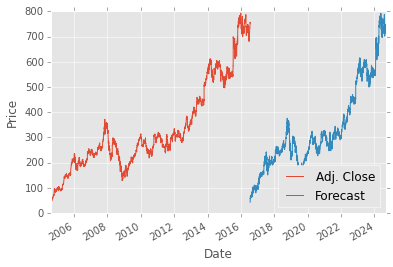

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')
df['Forecast'] = np.nan

#obtiene ultima fecha +1 
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Teoría de regresión

## regresión lineal

y = mx+b

m = ((x'y')-(xy)') / ( (x')^2 - (x^2)' )

donde x' es la media de x (promedio)

b = y' - m*(x')

(ajuste a puntos que parecen formar una recta)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


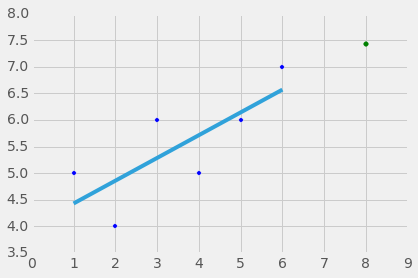

In [11]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

#plt.scatter(xs, ys)
#plt.show()

def best_fit_slope_and_intercept(xs, ys):
    m = ( (mean(xs) * mean(ys) - mean(xs * ys)) /
         (mean(xs)**2 - mean(xs**2)) )
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)

pred_x = 8
pred_y = m * pred_x + b

regression_line = [m*x+b for x in xs]
plt.scatter(xs, ys)
plt.scatter(pred_x, pred_y, color='g')

plt.plot(xs, regression_line)
plt.show()

## error (al cuadrado)

r^2 = 1 - (SE y_fit)/ (SE y')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


0.584415584416


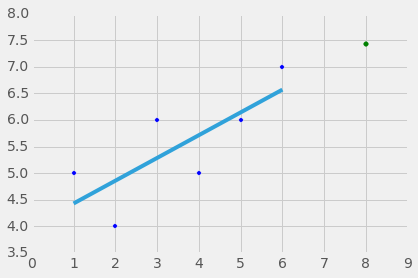

In [12]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

#plt.scatter(xs, ys)
#plt.show()

def best_fit_slope_and_intercept(xs, ys):
    m = ( (mean(xs) * mean(ys) - mean(xs * ys)) /
         (mean(xs)**2 - mean(xs**2)) )
    b = mean(ys) - m * mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):  # SE
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig)] * len(ys_orig)  # horizontal
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

m, b = best_fit_slope_and_intercept(xs, ys)

# predictions
pred_x = 8
pred_y = m * pred_x + b

# squared error
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

regression_line = [m*x+b for x in xs]
plt.scatter(xs, ys)
plt.scatter(pred_x, pred_y, color='g')

plt.plot(xs, regression_line)
plt.show()

datos de ejemplo

0.00103534197062


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


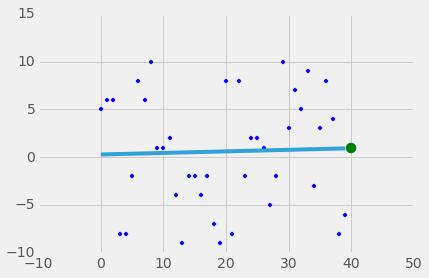

In [13]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

#xs = np.array([1,2,3,4,5,6], dtype=np.float64)
#ys = np.array([5,4,6,5,6,7], dtype=np.float64)

#plt.scatter(xs, ys)
#plt.show()

def best_fit_slope_and_intercept(xs, ys):
    m = ( (mean(xs) * mean(ys) - mean(xs * ys)) /
         (mean(xs)**2 - mean(xs**2)) )
    b = mean(ys) - m * mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):  # SE
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig)] * len(ys_orig)  # horizontal
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = range(hm)
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40, 10, 2, False)

m, b = best_fit_slope_and_intercept(xs, ys)

# predictions
pred_x = xs[-1] + 1
pred_y = m * pred_x + b

regression_line = [m*x+b for x in xs]

# squared error
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs, ys)
plt.scatter(pred_x, pred_y, s=100, color='g')

plt.plot(xs, regression_line)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


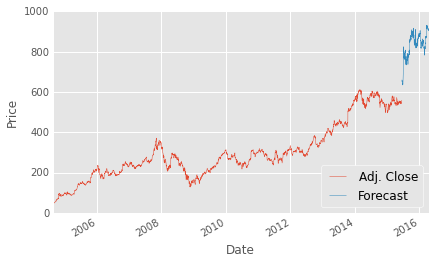

In [14]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 0.5

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0


df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.1*len(df)))  # desplazamiento hacia arriba
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately  = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)

df['Forecast'] = np.nan

#obtiene ultima fecha +1 
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

http://archive.ics.uci.edu/ml/datasets.html

## clasificación por medio de los k - vecinos cercanos

Obtiene los k vecinos más cercanos al punto a clasificar desde los datos, el punto se clasificará con la clase que tenga la mayoría de estos k-vecinos

In [15]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()  # default k=5
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,4,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1)

prediction = clf.predict(example_measures)
print(prediction)

0.992857142857
[2 2]


## funcionamiento interno de k-vecinos cercanos

r


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


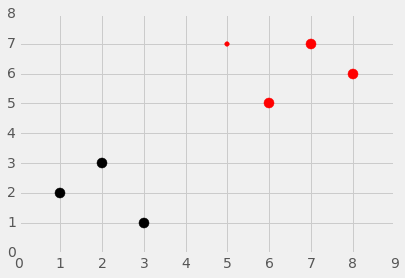

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
from matplotlib import style

style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than the total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)- np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]] #ordena y toma los primeros k votos
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[[plt.scatter(*ii, s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(*new_features, color=result)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
from matplotlib import style
import pandas as pd
import random

style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than the total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)- np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]] #ordena y toma los primeros k votos
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

df = pd.read_csv("breast-cancer-wisconsin.data.txt")
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()  #convierte datos a floats
random.shuffle(full_data)



test_size = 0.2  #  %
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]  # datos sin el último 20%
test_data = full_data[-int(test_size*len(full_data)):]  # datos en el último 20%

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1

print('Accuracy:', correct/total)

Accuracy: 0.9856115107913669
